Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Load Dataset

In [2]:
df = pd.read_csv("world-happiness-report.csv")
df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Pilih Fitur untuk Clustering

In [3]:
# Pilih kolom numerik yang akan digunakan
features = df[['Economy (GDP per Capita)', 
               'Health (Life Expectancy)', 
               'Happiness Score']].dropna()

# Simpan nama negara untuk referensi nanti
labels = df['Country'][features.index]


Standarisasi Fitur

In [4]:
# Standarisasi agar skala fitur seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


Elbow Method (Menentukan Jumlah Cluster Optimal)

In [5]:
# Coba berbagai jumlah cluster dan simpan nilai inertia
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


Visualisasi Elbow Plot

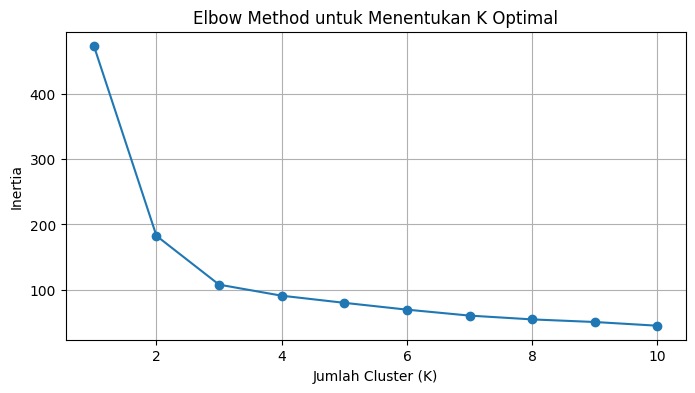

In [6]:
# Visualisasi untuk melihat elbow (tekukan terbaik)
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


Jalankan K-Means Clustering (K = 3)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


Tambahkan Hasil Cluster ke DataFrame

In [8]:
# Masukkan cluster ke DataFrame asli
features['Cluster'] = clusters
features['Country'] = labels.values
features.head()


,Economy (GDP per Capita),Health (Life Expectancy),Happiness Score,Cluster,Country
0,1.39651,0.94143,7.587,2,Switzerland
1,1.30232,0.94784,7.561,2,Iceland
2,1.32548,0.87464,7.527,2,Denmark
3,1.45900,0.88521,7.522,2,Norway
4,1.32629,0.90563,7.427,2,Canada


Visualisasi Hasil Clustering

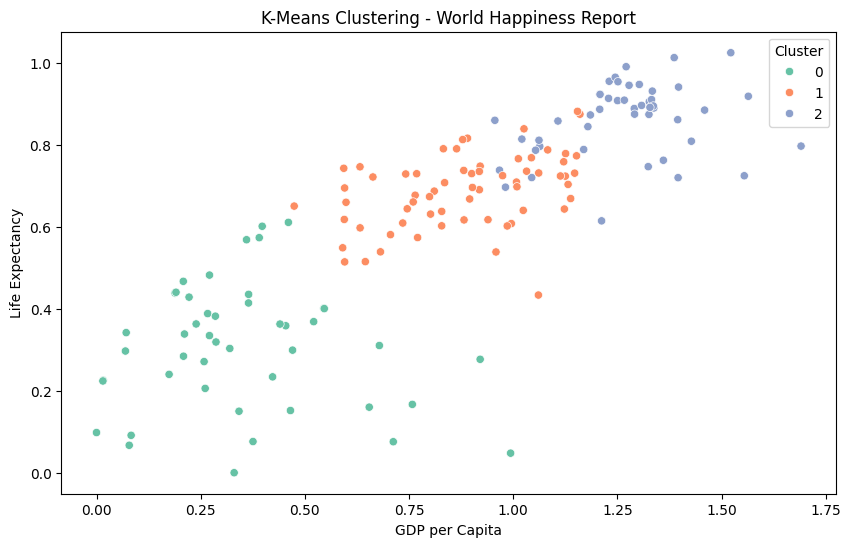

In [9]:
# Visualisasi scatter plot berdasarkan 2 fitur
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features,
                x='Economy (GDP per Capita)',
                y='Health (Life Expectancy)',
                hue='Cluster',
                palette='Set2')
plt.title("K-Means Clustering - World Happiness Report")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.show()
